# U.S. Medical Insurance Costs

In [1]:
import pandas as pd

insurance = pd.read_csv('insurance.csv')

In [2]:
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
columns = list(insurance.columns)
columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

**Information on data:**

1338 data entries (rows)

Variables: age, sex, bmi, children, smoker, region, charges


**Project questions:**
What are the average insurance charges and what is the spread? 
How do the charges differ: 
* in different regions
* for different sex

Is there any correlation between charges and
* age
* bmi
* number of children


In [3]:
# Save data in variables 

age = insurance['age']
sex = insurance['sex']
bmi = insurance['bmi']
children = insurance['children']
region = insurance['region']
charges = insurance['charges']

In [4]:
# Average charges 

charges_mean = charges.mean()
print("Average charges are", charges_mean.round(2), "USD.")

Average charges are 13270.42 USD.


In [5]:
# Average charges per region 

# Identify regions present in the data
print("Areas considered in this data are", region.unique())

Areas considered in this data are ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
charges_mean_regions = {}

for i in region: 
    series = insurance.loc[insurance['region'] == i, 'charges']
    mean = series.mean()
    charges_mean_regions[i] = mean

for regions in charges_mean_regions: 
    print("Average charge for the region", regions, "is", charges_mean_regions[regions].round(2), "USD.")

Average charge for the region southwest is 12346.94 USD.
Average charge for the region southeast is 14735.41 USD.
Average charge for the region northwest is 12417.58 USD.
Average charge for the region northeast is 13406.38 USD.


In [13]:
# Average charges per sex 

charges_mean_sex = {}

for i in sex: 
    series = insurance.loc[insurance['sex'] == i, 'charges']
    mean = series.mean()
    charges_mean_sex[i] = mean

charges_mean_sex    

for sex in charges_mean_sex: 
    print("Average charge for", sex, "is", charges_mean_sex[sex].round(2), "USD.")

Average charge for female is 12569.58 USD.
Average charge for male is 13956.75 USD.


<AxesSubplot: xlabel='sex', ylabel='charges'>

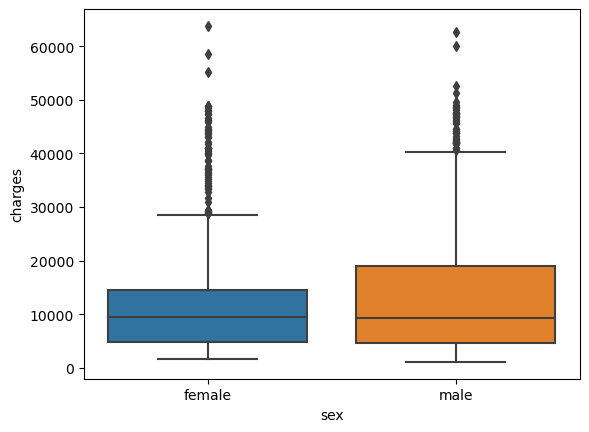

In [20]:
# Visualize the difference in spread for both sexes

import seaborn as sns

sns.boxplot(insurance, x='sex', y='charges')

While the average charges are not significantly different for men and women, the 75% quartile is significantly higher for men. While 75% of women pay less than approximately 15.000 USD, the percentage for men below this level is lower. 

<AxesSubplot: xlabel='age', ylabel='charges'>

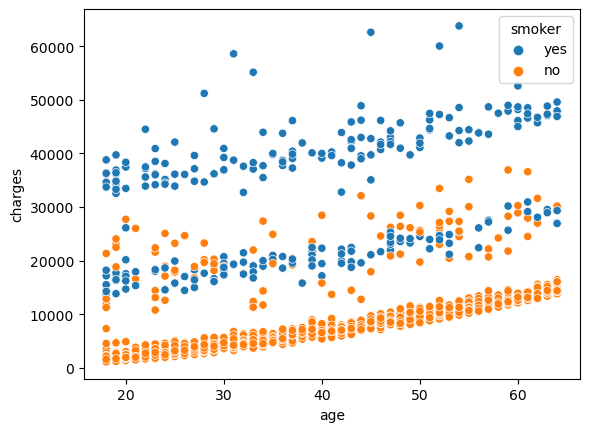

In [24]:
# Visualize possible correlation between age and charges

sns.scatterplot(insurance, x='age', y='charges', hue='smoker')

The scatterplot shows that there is a tendency of higher charges for higher age. However, it also indicates that there are other factors that have a more significant impact on the charges. 

By adding smoker status as a hue, it becomes evident that this has a big impact on the charges, whereas within each group (smoker, non-smoker) the age remains an additional factor for increased charges. 

<AxesSubplot: xlabel='bmi', ylabel='charges'>

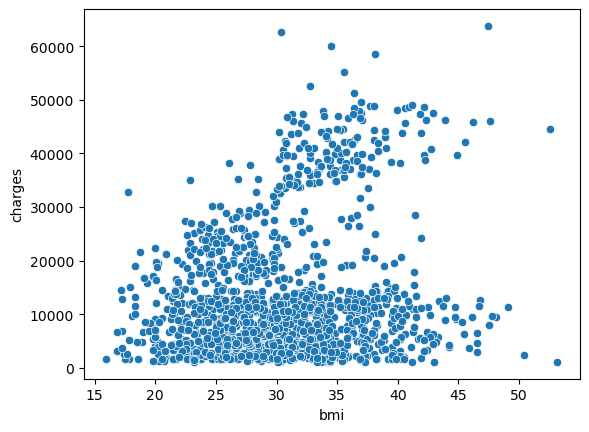

In [25]:
# Visualize possible correlation of charges to bmi

sns.scatterplot(insurance, x='bmi', y='charges')

The graph suggests that there is a positive correlation between bmi and charges. 

<AxesSubplot: xlabel='children', ylabel='charges'>

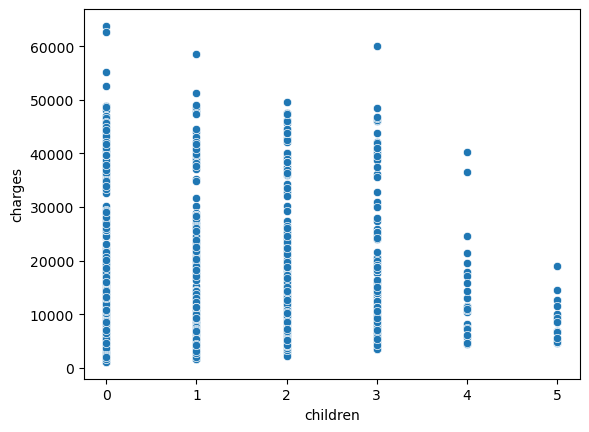

In [28]:
# Visualize possible correlation of charges to number of children

sns.scatterplot(insurance, x='children', y='charges')

The graph suggests a negative correlation between number of children and charges. 